<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/DL_CNN_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import  plot_model
tf.__version__

'2.14.0'

In [43]:
from google.colab import drive
drive.mount('/content/drive')
# 모델 저장 폴더 설정
PATH = '/content/drive/MyDrive/biodata/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. CNN을 활용한 MNIST Digits 인식

In [44]:
# data 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('학습셋 이미지: %d 개' % (x_train.shape[0]))
print('테스트셋 이미지: %d 개' % (x_test.shape[0]))

학습셋 이미지: 60000 개
테스트셋 이미지: 10000 개


In [45]:
x_train.shape

(60000, 28, 28)

In [46]:
y_train.shape

(60000,)

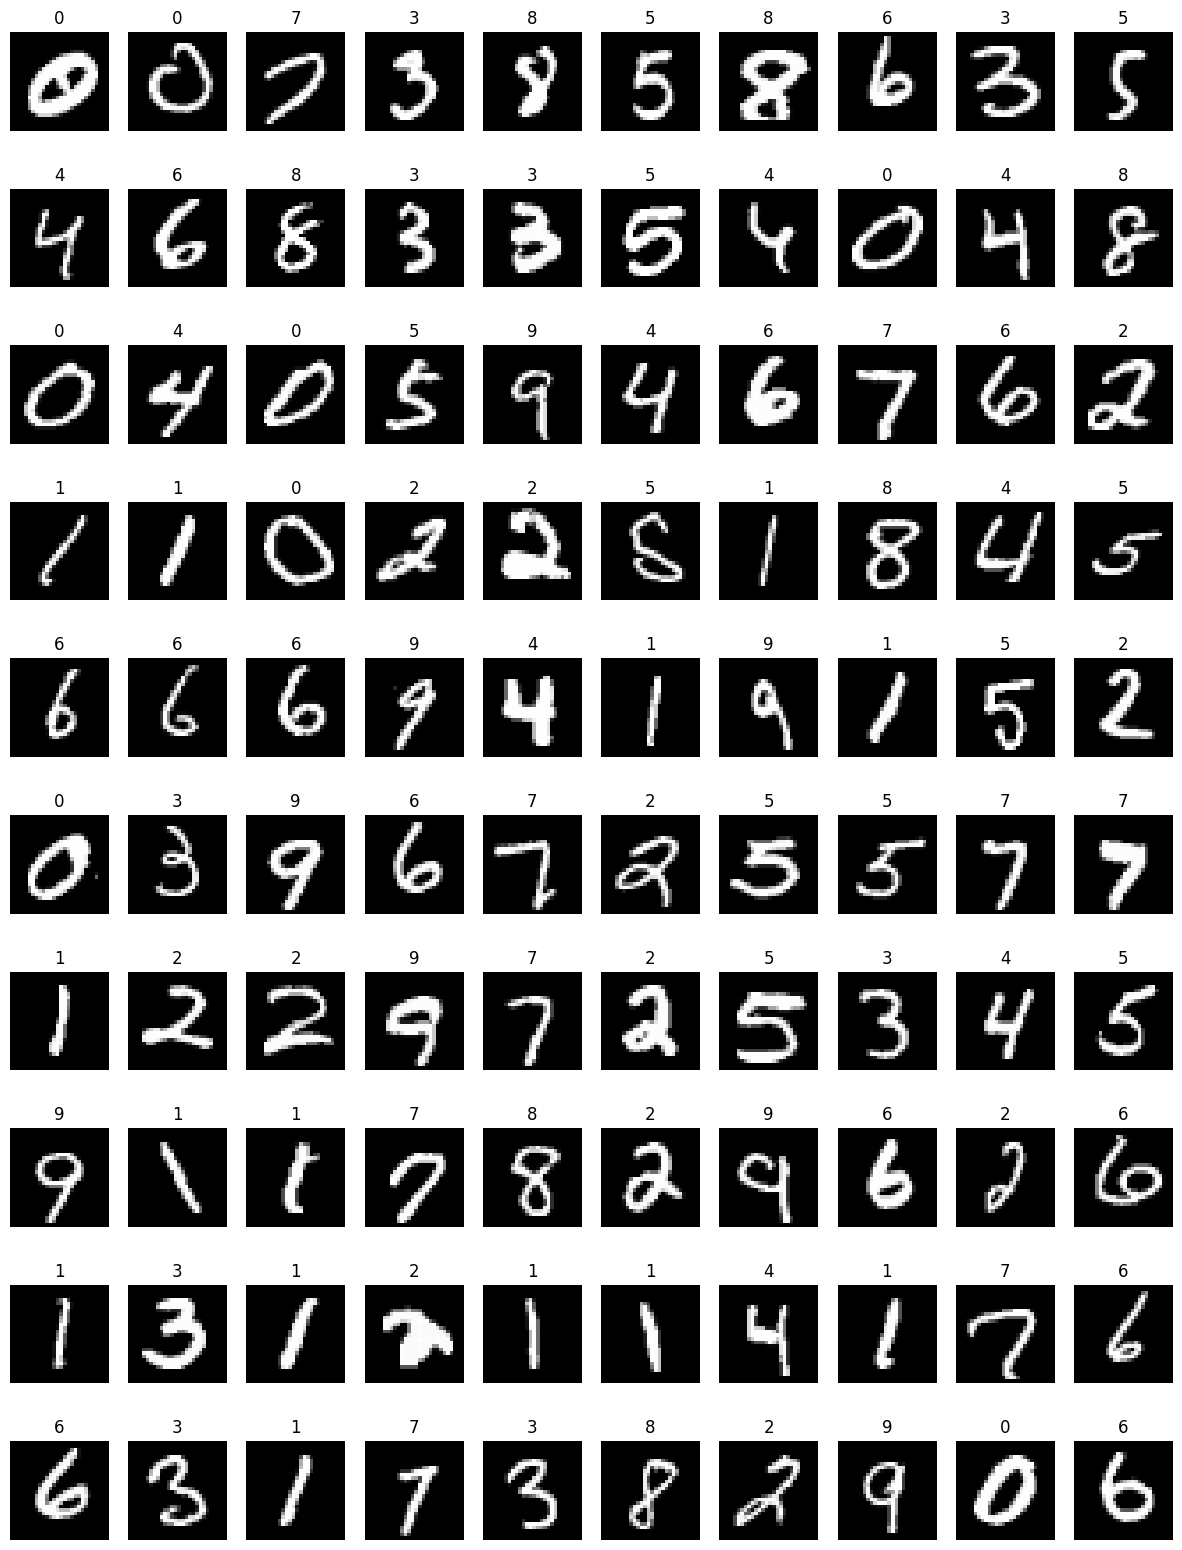

In [47]:
# 데이터 보기

import random
n_samples=100
idx_list = random.sample(range(x_train.shape[0]), n_samples)

plt.figure(figsize=(15, 20))
for i, idx in enumerate( idx_list ):
    plt.subplot(10,10, i+1)
    plt.imshow( x_train[idx] , cmap='gray', vmin=0, vmax=255) # 이미지
    plt.title( y_train[idx] ) # 정답
    plt.axis('off')
plt.show()

In [48]:
x_train.max()

255

In [49]:
# 데이터 전처리
# 255 를 나누어서 normalize (x의 최댓값으로)
x_train = x_train.reshape( x_train.shape[0], 28, 28, 1) / 255

# 테스트셋 변환
x_test = x_test.reshape( x_test.shape[0], 28, 28, 1) / 255



In [50]:
print (x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [51]:
x_train.max()

1.0

In [52]:
# Model
model = keras.Sequential()
model.add( Conv2D( filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D( pool_size=(2, 2) ) )
model.add( Conv2D( filters=64, kernel_size=(3,3), activation='relu'))
model.add( MaxPooling2D( pool_size=(2, 2) ))

model.add( Flatten() )
model.add( Dropout( 0.25 ) )
model.add( Dense(128, activation = 'relu' ) )
model.add( Dropout( 0.25 ) )
model.add( Dense(64, activation = 'relu' ) )
model.add( Dropout( 0.25 ) )
model.add( Dense(10, activation = 'softmax' ) )

model.compile( loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"] )

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)             

In [54]:
# 모델 저장 조건 설정
modelfile = PATH+ 'MnistCNN_best.h5'

checkpointer = ModelCheckpoint(filepath=modelfile, monitor="val_loss",
                              verbose=1, save_best_only=True)

ealry_stopping_callback = EarlyStopping(monitor="val_loss",
                                        patience=20,
                                        verbose=1)

fit_history = model.fit(x_train, y_train,
                          validation_data=[x_test, y_test],
                          epochs=  50,
                          batch_size=  200 ,
                          verbose=  1,
                          callbacks=[  checkpointer, ealry_stopping_callback])

print("Train Accuracy:", model.evaluate(x_train, y_train)[1])
print("Test Accuracy:",  model.evaluate(x_test, y_test)[1])

Epoch 1/50
299/300 [============================>.] - ETA: 0s - loss: 0.4097 - accuracy: 0.8695
Epoch 1: val_loss improved from inf to 0.06429, saving model to /content/drive/MyDrive/biodata/MnistCNN_best.h5
300/300 [==============================] - 4s 7ms/step - loss: 0.4088 - accuracy: 0.8698 - val_loss: 0.0643 - val_accuracy: 0.9790
Epoch 2/50
 18/300 [>.............................] - ETA: 1s - loss: 0.1413 - accuracy: 0.9569

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


296/300 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9694
Epoch 2: val_loss improved from 0.06429 to 0.04331, saving model to /content/drive/MyDrive/biodata/MnistCNN_best.h5
300/300 [==============================] - 2s 6ms/step - loss: 0.1025 - accuracy: 0.9695 - val_loss: 0.0433 - val_accuracy: 0.9869
Epoch 3/50
294/300 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9786
Epoch 3: val_loss improved from 0.04331 to 0.03384, saving model to /content/drive/MyDrive/biodata/MnistCNN_best.h5
300/300 [==============================] - 2s 6ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0338 - val_accuracy: 0.9883
Epoch 4/50
293/300 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9823
Epoch 4: val_loss did not improve from 0.03384
300/300 [==============================] - 2s 6ms/step - loss: 0.0625 - accuracy: 0.9821 - val_loss: 0.0339 - val_accuracy: 0.9887
Epoch 5/50
297/300 [============================>.]

In [55]:
(fit_history).history

{'loss': [0.40884825587272644,
  0.102510966360569,
  0.07506721466779709,
  0.062490686774253845,
  0.049909017980098724,
  0.046197663992643356,
  0.04161118343472481,
  0.03634735941886902,
  0.03230263292789459,
  0.02826734445989132,
  0.0275302492082119,
  0.025282656773924828,
  0.02247772552073002,
  0.02114909701049328,
  0.021656230092048645,
  0.02113482914865017,
  0.01806631311774254,
  0.017141764983534813,
  0.016899067908525467,
  0.015849392861127853,
  0.015389569103717804,
  0.014935686253011227,
  0.013663039542734623,
  0.01350136287510395,
  0.012445027008652687,
  0.012231768108904362,
  0.011669615283608437,
  0.010797007940709591,
  0.011741993948817253,
  0.009995467029511929,
  0.011644590646028519],
 'accuracy': [0.869783341884613,
  0.9695000052452087,
  0.9785500168800354,
  0.9821000099182129,
  0.9854666590690613,
  0.9872166514396667,
  0.9874833226203918,
  0.9893166422843933,
  0.9903500080108643,
  0.9917666912078857,
  0.9920333623886108,
  0.992150

## CNN 분석

In [56]:
model = load_model( PATH + 'MnistCNN_best.h5' )

In [57]:
model.layers

In [58]:
conv1 = keras.Model( inputs = model.input , outputs = model.layers[0].output )
conv2 = keras.Model( inputs = model.input , outputs = model.layers[2].output )
pool1 = keras.Model( inputs = model.input , outputs = model.layers[1].output )
pool2 = keras.Model( inputs = model.input , outputs = model.layers[3].output )

In [59]:
y_test[:80]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7], dtype=uint8)

In [60]:
samples = [3, 2, 1, 18, 4, 8, 11, 0, 61, 7]
inputs = x_test[ samples ]
print(inputs.shape)

y_true = y_test[ samples ]
print(y_true)

(10, 28, 28, 1)
[0 1 2 3 4 5 6 7 8 9]


In [61]:
feature_maps_1 = conv1.predict( inputs )
type(feature_maps_1), feature_maps_1.shape

1/1 [==============================] - 0s 39ms/step


(numpy.ndarray, (10, 26, 26, 32))

In [62]:
pool_maps_1 = pool1.predict( inputs )

1/1 [==============================] - 0s 40ms/step


In [63]:
feature_maps_2 = conv2.predict( inputs )

1/1 [==============================] - 0s 52ms/step


In [64]:
pool_maps_2 = pool2.predict( inputs )

1/1 [==============================] - 0s 46ms/step


In [65]:
def feature_map_1(k):
    fig, axs = plt.subplots(4, 8, figsize=(10,5))
    for j  in range(4):
        for i in range(8):
            axs[j, i].imshow(feature_maps_1[k,:,:,i+j*8], cmap='gray')
            axs[j, i].axis('off')
            axs[j, i].grid(False)
    plt.show()

In [66]:
def pooling_layer_1(k):
    fig, axs = plt.subplots(4, 8, figsize=(5,3))
    for j  in range(4):
        for i in range(8):
            axs[j, i].imshow(pool_maps_1[k,:,:,i+j*8], cmap='gray')
            axs[j, i].axis('off')
            axs[j, i].grid(False)
    plt.show()

In [67]:
def feature_map_2(k):
    fig, axs = plt.subplots(8, 8, figsize=(5,5))
    for j  in range(8):
        for i in range(8):
            axs[j, i].imshow(feature_maps_2[k,:,:,i+j*8], cmap='gray')
            axs[j, i].axis('off')
            axs[j, i].grid(False)
    plt.show()

In [68]:
def pooling_layer_2(k):
    fig, axs = plt.subplots(8, 8, figsize=(3,3))
    for j  in range(8):
        for i in range(8):
            axs[j, i].imshow(pool_maps_2[k,:,:,i+j*8], cmap='gray')
            axs[j, i].axis('off')
            axs[j, i].grid(False)

    plt.show()

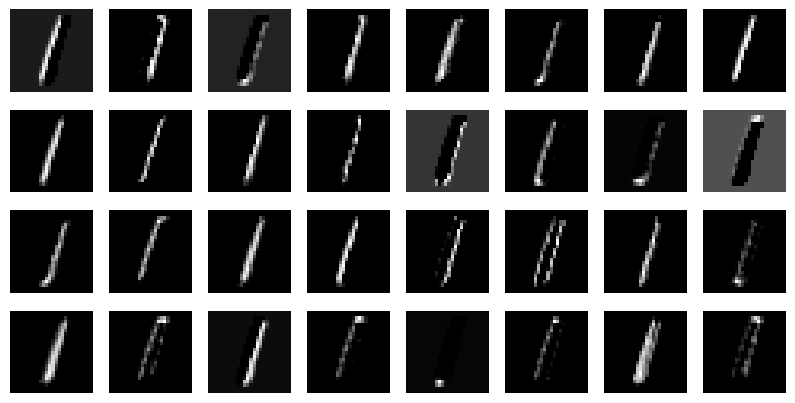

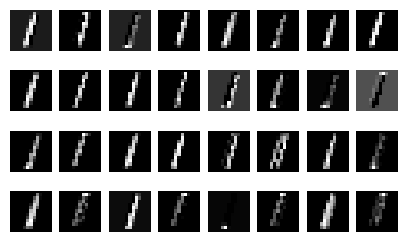

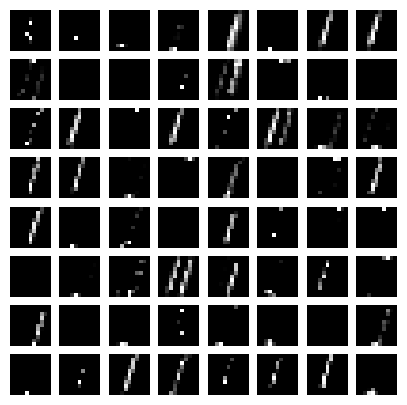

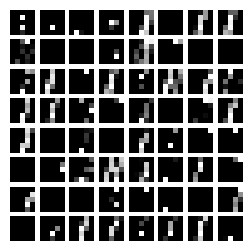

In [69]:
k = 1
feature_map_1(k)
pooling_layer_1(k)
feature_map_2(k)
pooling_layer_2(k)

In [70]:
# kernel 분석

In [72]:
conv = model.layers[0]

In [74]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [76]:
conv_weights = conv.weights[0].numpy()

In [77]:
conv_weights.shape

(3, 3, 1, 32)

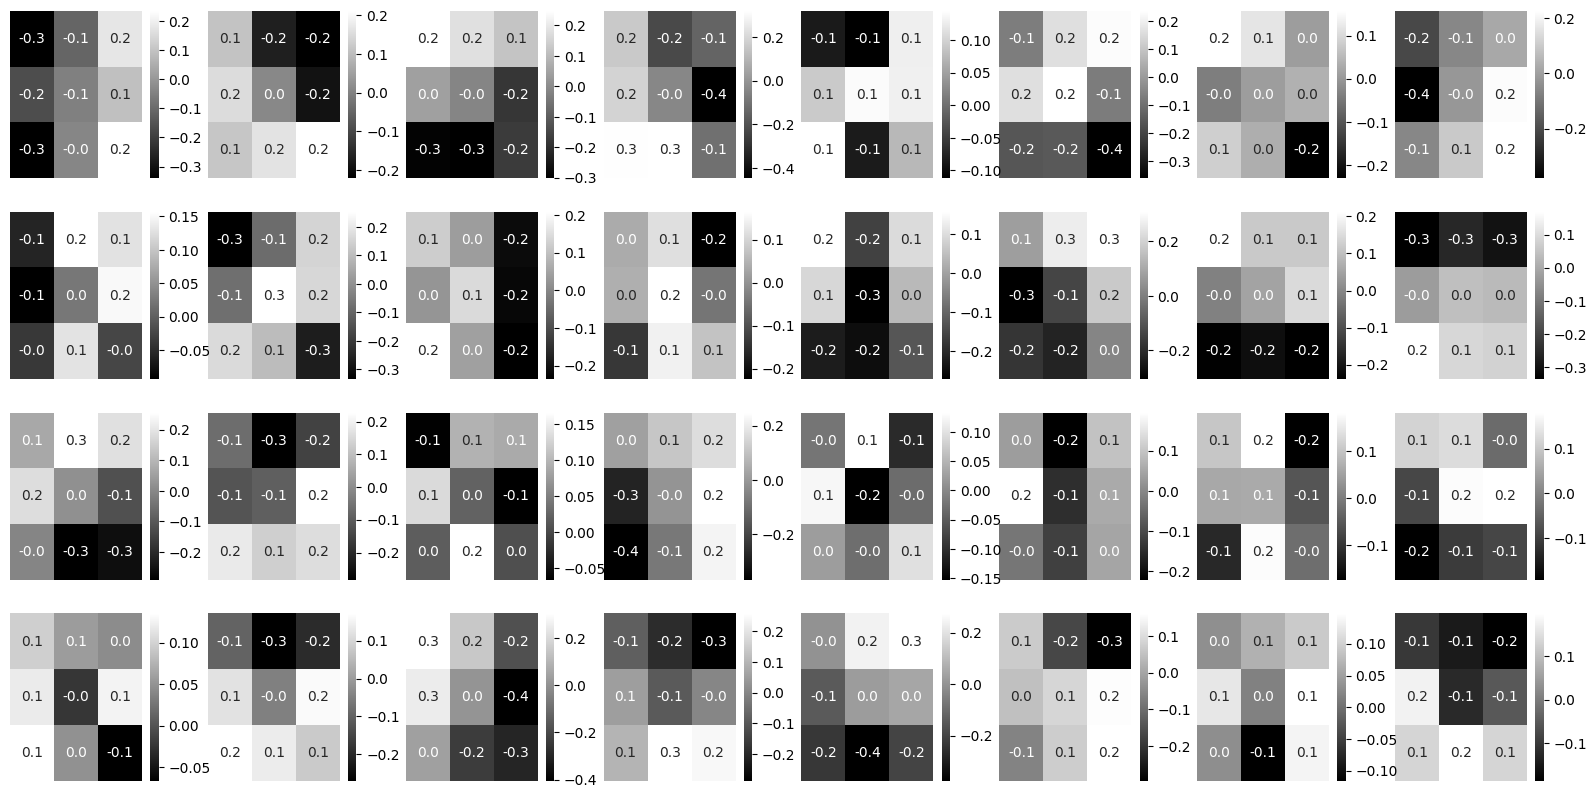

In [78]:
fig, axs = plt.subplots(4, 8, figsize=(20,10))

for i in range(4):
    for j in range(8):
      plt.subplot( 4, 8, i*8 + j+1)
      sns.heatmap(conv_weights[ :, :, 0, i*8+j], annot= True, fmt='.1f', cmap='gray')
      plt.axis('off')
plt.show()

# 2. 이미지 OCR- 연속 문자 인식 프로젝트

In [ ]:
import cv2

## (1) 이미지에서 글자가 있는 영역 추출

In [ ]:
# 이미지 읽어 들이기
im = cv2.imread(PATH+'numbers-100.png')

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)

# 윤곽 추출하기
contours = cv2.findContours(,
                             ,
                             )[0]

# 추출한 윤곽을 표시
for cnt in contours:
    x, y, w, h = cv2.  (cnt)
    if h < 20: continue
    color = ( , , )
    cv2.rectangle(im, (x, y), (x+w, y+h), color, 2)

cv2.imwrite(PATH+'numbers-100-contour.png', im)

plt.imshow( )
plt.grid(False)
plt.show()

## (2)  개별 숫자 영역 추출하여 영상 리스트 만들기

In [ ]:
# 추출한 좌표 정렬하기
rects = []
im_w =
for i, cnt in enumerate( ):



rects = sorted(rects, key= ) # 정렬
print(rects[0:5])

In [ ]:
# 해당 영역의 이미지 데이터 추출
X = []
for i, r in enumerate( ):
     = r
    num = gray[ , ] # 부분 이미지 추출
    num =   # 반전
    # 정사각형 내부에 그림 옮기기
    ww = round((w if w > h else h) * 1.85)



    spc[ , ] = num
    num = cv2. (spc, (28, 28)) # MNIST 크기 맞추기
    X.append(num)
print(len(X))

In [ ]:
X_test =
X_test.shape

##  (3) CNN 모델로 인식하기

In [ ]:
x_test =
x_test.shape

In [ ]:
model = load_model( PATH + 'MnistCNN_best.h5' )

plot_model(model, show_shapes=True)

In [ ]:
# 예측하기


In [ ]:
s = "01234567890123456789" + \
    "01234567890123456789" + \
    "01234567890123456789" + \
    "01234567890123456789" + \
    "01234567890123456789"
gt = list(s)

ng_list=[]
ok = 0

for i, ans in enumerate(  ):

    if  ==  gt :
        ok += 1
    else:
        print("[ng]", i, "번", ans, "!=", gt[i], np.int32(n*100))
        ng_list.append(i)

print("정답률:", ok / len(gt))